# 📋 Analizador de Sentencias IPP/INSS - Google Colab

> **Sistema de Análisis Inteligente de Documentos Legales con IA**

Este notebook demuestra las capacidades del **Analizador de Sentencias IPP/INSS**, una aplicación web avanzada que utiliza inteligencia artificial para analizar sentencias judiciales, informes médicos y documentos legales relacionados con Incapacidad Permanente Parcial (IPP) y el Instituto Nacional de la Seguridad Social (INSS).

## 🎯 Objetivos del Notebook

1. **Demostrar** las funcionalidades principales del sistema
2. **Explicar** la arquitectura y tecnologías utilizadas
3. **Proporcionar** ejemplos prácticos de uso
4. **Facilitar** la comprensión del análisis jurídico con IA

---

**🔗 Enlaces importantes:**
- [📚 Repositorio GitHub](https://github.com/gracobjo/sentencias)
- [🌐 Aplicación Web](https://sentencias.onrender.com)
- [📖 Documentación Completa](https://github.com/gracobjo/sentencias/tree/main/docs)


## 🚀 Características Principales

### 🔍 **Análisis Inteligente**
- **Análisis de IA**: Procesamiento avanzado con modelos de machine learning
- **Análisis de Discrepancias**: Detección automática de contradicciones médico-legales
- **Análisis Predictivo**: Predicción de resultados basada en patrones históricos
- **Extracción de Frases Clave**: Identificación automática de términos jurídicos relevantes

### 📊 **Funcionalidades Avanzadas**
- **Análisis Híbrido**: Combina IA con reglas jurídicas especializadas
- **Ponderación por Instancia**: TS (x1.5), TSJ (x1.2), otras (x1.0)
- **Generación de Demandas**: Creación automática de documentos legales
- **Exportación**: Descarga en PDF y Word con análisis completo

### 🎯 **Casos de Uso**
- **Abogados**: Análisis rápido de sentencias y preparación de recursos
- **Peritos Médicos**: Evaluación de discrepancias en informes médicos
- **Estudiantes de Derecho**: Aprendizaje de análisis jurídico
- **Investigadores**: Análisis estadístico de resoluciones legales


## 🛠️ Tecnologías Utilizadas

### **Backend**
- **Python 3.11+** - Lenguaje principal
- **FastAPI** - Framework web moderno
- **Scikit-learn** - Machine learning
- **PyPDF2** - Procesamiento de PDFs
- **python-docx** - Generación de documentos Word

### **IA y ML**
- **TF-IDF** - Vectorización de texto
- **Sentence-BERT** - Embeddings semánticos
- **Análisis de Patrones** - Reglas jurídicas especializadas

### **Frontend**
- **HTML5/CSS3** - Estructura y estilos
- **Bootstrap 5** - Framework CSS
- **JavaScript ES6+** - Interactividad
- **Chart.js** - Visualizaciones


## 📦 Instalación y Configuración

### Paso 1: Configurar el entorno de Google Colab

Primero, necesitamos instalar las dependencias necesarias directamente en Colab:


In [ ]:
# Instalar dependencias principales para Google Colab
print("📦 Instalando dependencias para Google Colab...")

# Instalar librerías básicas
%pip install scikit-learn pandas numpy
%pip install PyPDF2 python-docx
%pip install matplotlib seaborn plotly
%pip install requests beautifulsoup4

# Instalar librerías opcionales con manejo de errores
try:
    %pip install sentence-transformers
    SENTENCE_TRANSFORMERS_AVAILABLE = True
    print("✅ sentence-transformers instalado")
except Exception as e:
    print(f"⚠️ sentence-transformers no disponible: {e}")
    SENTENCE_TRANSFORMERS_AVAILABLE = False

try:
    %pip install reportlab
    REPORTLAB_AVAILABLE = True
    print("✅ reportlab instalado")
except Exception as e:
    print(f"⚠️ reportlab no disponible: {e}")
    REPORTLAB_AVAILABLE = False

# Verificar instalación
import sys
print(f"\n✅ Python version: {sys.version}")
print("✅ Dependencias básicas instaladas correctamente")
print("💡 Algunas librerías opcionales pueden no estar disponibles en todos los entornos")


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   -------------------- ------------------- 6.0/11.6 MB 28.4 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 27.9 MB/s  0:00:00
   ---------------------------------------- 0.0/563.4 kB ? eta -:--:--
   ---------------------------------------- 563.4/563.4 kB 20.1 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 19.3 MB/s  0:00:00
   ----------------------

### Paso 2: Descargar modelos y datos necesarios


In [14]:
# Crear directorio para modelos
import os
os.makedirs('models', exist_ok=True)

# Descargar modelos desde GitHub (si están disponibles)
import requests
import json

# Crear archivo de frases clave de ejemplo
frases_clave_ejemplo = {
    "incapacidad_permanente_parcial": [
        "incapacidad permanente parcial",
        "IPP",
        "limitación funcional",
        "disminución rendimiento",
        "33% calificación"
    ],
    "manguito_rotador": [
        "manguito rotador",
        "rotura completa",
        "tenopatía",
        "limitación flexión",
        "limitación abducción"
    ],
    "instancias_juridicas": [
        "Tribunal Supremo",
        "TSJ",
        "Audiencia Provincial",
        "Juzgado de lo Social"
    ]
}

# Guardar frases clave
with open('models/frases_clave.json', 'w', encoding='utf-8') as f:
    json.dump(frases_clave_ejemplo, f, ensure_ascii=False, indent=2)

print("✅ Modelos y datos de ejemplo creados")
print("📁 Directorio models/ creado con archivos necesarios")


✅ Modelos y datos de ejemplo creados
📁 Directorio models/ creado con archivos necesarios


### Paso 3: Crear clases de análisis simplificadas para Colab


In [15]:
# Crear clases simplificadas para demostración en Colab
import re
import json
from typing import Dict, List, Any
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

class AnalizadorLegalColab:
    """Versión simplificada del analizador legal para Google Colab"""
    
    def __init__(self):
        self.frases_clave = self._cargar_frases_clave()
        self.vectorizer = TfidfVectorizer(max_features=1000, stop_words='spanish')
        
    def _cargar_frases_clave(self) -> Dict[str, List[str]]:
        """Cargar frases clave desde el archivo JSON"""
        try:
            with open('models/frases_clave.json', 'r', encoding='utf-8') as f:
                return json.load(f)
        except FileNotFoundError:
            return {}
    
    def analizar_texto(self, texto: str) -> Dict[str, Any]:
        """Analizar texto legal y extraer información relevante"""
        resultado = {
            'clasificacion': self._clasificar_documento(texto),
            'confianza': self._calcular_confianza(texto),
            'instancia': self._detectar_instancia(texto),
            'frases_clave': self._extraer_frases_clave(texto),
            'metadatos': self._extraer_metadatos(texto)
        }
        return resultado
    
    def _clasificar_documento(self, texto: str) -> str:
        """Clasificar el tipo de documento"""
        texto_lower = texto.lower()
        
        if 'sentencia' in texto_lower:
            return 'Sentencia Judicial'
        elif 'informe médico' in texto_lower or 'pericial' in texto_lower:
            return 'Informe Médico'
        elif 'demanda' in texto_lower:
            return 'Demanda'
        elif 'recurso' in texto_lower:
            return 'Recurso'
        else:
            return 'Documento Legal Genérico'
    
    def _calcular_confianza(self, texto: str) -> float:
        """Calcular nivel de confianza del análisis"""
        # Simulación basada en longitud y presencia de términos jurídicos
        longitud = len(texto)
        terminos_juridicos = len([term for term in ['sentencia', 'tribunal', 'demanda', 'recurso'] 
                                if term in texto.lower()])
        
        confianza = min(0.95, 0.3 + (longitud / 10000) * 0.4 + terminos_juridicos * 0.1)
        return round(confianza, 2)
    
    def _detectar_instancia(self, texto: str) -> str:
        """Detectar la instancia judicial"""
        texto_lower = texto.lower()
        
        if 'tribunal supremo' in texto_lower or 'ts' in texto_lower:
            return 'Tribunal Supremo'
        elif 'tribunal superior' in texto_lower or 'tsj' in texto_lower:
            return 'Tribunal Superior de Justicia'
        elif 'audiencia provincial' in texto_lower:
            return 'Audiencia Provincial'
        elif 'juzgado' in texto_lower:
            return 'Juzgado de lo Social'
        else:
            return 'Instancia no identificada'
    
    def _extraer_frases_clave(self, texto: str) -> List[str]:
        """Extraer frases clave del texto"""
        frases_encontradas = []
        
        for categoria, frases in self.frases_clave.items():
            for frase in frases:
                if frase.lower() in texto.lower():
                    frases_encontradas.append(frase)
        
        return frases_encontradas[:10]  # Limitar a 10 frases
    
    def _extraer_metadatos(self, texto: str) -> Dict[str, Any]:
        """Extraer metadatos del documento"""
        # Buscar fecha
        fecha_pattern = r'\d{1,2}[\/\-\.]\d{1,2}[\/\-\.]\d{2,4}'
        fechas = re.findall(fecha_pattern, texto)
        
        # Buscar números de expediente
        expediente_pattern = r'(?:expediente|procedimiento|autos)\s*(?:n[ºo]?\.?\s*)?(\d+[\/\-]\d+)'
        expedientes = re.findall(expediente_pattern, texto, re.IGNORECASE)
        
        return {
            'fechas_encontradas': fechas[:3],
            'expedientes': expedientes[:3],
            'longitud_texto': len(texto),
            'palabras_totales': len(texto.split())
        }

# Crear instancia del analizador
analizador_colab = AnalizadorLegalColab()
print("✅ Analizador Legal para Colab inicializado correctamente")


✅ Analizador Legal para Colab inicializado correctamente


## 🎮 Demostración Práctica

### 1. Análisis de Documentos Legales

Vamos a demostrar cómo el sistema analiza documentos legales reales:


In [16]:
# Usar el analizador específico para Colab
import json

# Texto de ejemplo de una sentencia
texto_ejemplo = """
SENTENCIA NÚMERO 1234/2024

En Madrid, a 15 de enero de 2024

VISTOS los autos del procedimiento administrativo seguido a instancia de D. Juan Pérez,
contra la resolución del Instituto Nacional de la Seguridad Social por la que se le
denegó el reconocimiento de la Incapacidad Permanente Parcial.

FUNDAMENTOS DE DERECHO

PRIMERO.- El actor alega que padece una lesión en el hombro derecho consistente en
una rotura completa del manguito rotador, con limitación funcional significativa
que le impide realizar su trabajo habitual como operario de construcción.

SEGUNDO.- El informe médico pericial establece que la lesión es de carácter
permanente y que la limitación funcional supera el 33% requerido para el
reconocimiento de IPP.

TERCERO.- La prueba documental aportada demuestra la existencia de la lesión
y su impacto en la capacidad laboral del actor.

FALLO

Que debemos estimar y estimamos la demanda interpuesta por D. Juan Pérez,
reconociéndole el derecho a la Incapacidad Permanente Parcial con una
calificación del 35%.
"""

# Realizar análisis con el analizador de Colab
resultado = analizador_colab.analizar_texto(texto_ejemplo)

print("🔍 RESULTADO DEL ANÁLISIS:")
print("=" * 50)
print(f"📊 Clasificación: {resultado.get('clasificacion', 'N/A')}")
print(f"📈 Confianza: {resultado.get('confianza', 0):.2%}")
print(f"🏛️ Instancia: {resultado.get('instancia', 'N/A')}")
print(f"📝 Frases clave encontradas: {len(resultado.get('frases_clave', []))}")

if resultado.get('frases_clave'):
    print("\n🔑 Frases clave identificadas:")
    for frase in resultado['frases_clave'][:5]:  # Mostrar solo las primeras 5
        print(f"  • {frase}")

print("\n📋 Metadatos extraídos:")
metadatos = resultado.get('metadatos', {})
print(f"  • Fechas encontradas: {metadatos.get('fechas_encontradas', [])}")
print(f"  • Expedientes: {metadatos.get('expedientes', [])}")
print(f"  • Longitud del texto: {metadatos.get('longitud_texto', 0)} caracteres")
print(f"  • Palabras totales: {metadatos.get('palabras_totales', 0)}")


🔍 RESULTADO DEL ANÁLISIS:
📊 Clasificación: Sentencia Judicial
📈 Confianza: 54.00%
🏛️ Instancia: Instancia no identificada
📝 Frases clave encontradas: 5

🔑 Frases clave identificadas:
  • incapacidad permanente parcial
  • IPP
  • limitación funcional
  • manguito rotador
  • rotura completa

📋 Metadatos extraídos:
  • Fechas encontradas: []
  • Expedientes: []
  • Longitud del texto: 1034 caracteres
  • Palabras totales: 158


### 2. Análisis de Discrepancias Médico-Legales

El sistema puede identificar contradicciones entre diagnósticos médicos y calificaciones legales:


In [ ]:
# Implementación directa de AnalizadorDiscrepancias para Google Colab
import re
import logging
from typing import Dict, List, Any, Optional, Tuple
from datetime import datetime
import json

class AnalizadorDiscrepanciasColab:
    """
    Analizador especializado en identificar discrepancias entre diagnósticos médicos
    y calificaciones legales, especialmente en casos de LPNI vs IPP
    Versión simplificada para Google Colab
    """
    
    def __init__(self):
        """Inicializa el analizador de discrepancias"""
        self.patrones_discrepancias = self._cargar_patrones_discrepancias()
        self.argumentos_juridicos = self._cargar_argumentos_juridicos()
        self.criterios_ipp = self._cargar_criterios_ipp()
        
    def _cargar_patrones_discrepancias(self) -> Dict[str, List[str]]:
        """Carga patrones para detectar discrepancias médicas-legales"""
        return {
            "lesiones_graves": [
                r"rotura\s+(?:de\s+)?espesor\s+completo",
                r"retracción\s+fibrilar\s+\d+\s*mm",
                r"tenopatía\s+severa",
                r"artropatía\s+acromioclavicular\s+severa",
                r"lesión\s+estructural\s+grave",
                r"rotura\s+completa\s+del\s+manguito\s+rotador",
                r"anclajes?\s+(?:corkscrew|tornillos?)",
                r"cirugía\s+reconstructiva"
            ],
            "limitaciones_funcionales": [
                r"flexión\s+activa\s+solo\s+\d+[°º]",
                r"abducción\s+activa\s+\d+[°º]",
                r"fuerza\s+insuficiente\s+para\s+vencer\s+la\s+gravedad",
                r"balance\s+muscular\s+\d+/\d+",
                r"fuerza\s+de\s+garra\s+solo\s+\d+\s*kg",
                r"limitación\s+activa\s+a\s+\d+[°º]",
                r"discinesia\s+escapular",
                r"atrofia\s+periescapular",
                r"prácticamente\s+nulo\s+desarrollo\s+de\s+fuerza"
            ],
            "contradicciones_internas": [
                r"no\s+presenta\s+limitación\s+importante.*?limitación\s+activa",
                r"no\s+impide\s+actividades.*?limitación\s+activa",
                r"alta\s+médica.*?limitaciones?\s+persistentes",
                r"recuperación.*?secuelas?\s+permanentes",
                r"movilidad\s+pasiva.*?activa\s+sigue\s+limitada"
            ],
            "terminologia_lpni": [
                r"lesiones?\s+permanentes?\s+no\s+incapacitantes?",
                r"LPNI",
                r"secuelas?\s+no\s+invalidantes?",
                r"molestias?\s+leves?",
                r"lesiones?\s+menores?"
            ],
            "terminologia_ipp": [
                r"incapacidad\s+permanente\s+parcial",
                r"IPP",
                r"disminución\s+(?:del\s+)?rendimiento.*?33%",
                r"art\.\s*194\.2\s+LGSS",
                r"limitación\s+funcional\s+permanente",
                r"merma\s+funcional.*?33%"
            ],
            "evidencia_objetiva": [
                r"RMN.*?\d{2}\.\d{2}\.\d{4}",
                r"informe\s+de\s+biomecánica",
                r"fuerza.*?normal.*?>\d+\s*kg",
                r"duración\s+del\s+proceso.*?\d+\s*meses?",
                r"múltiples\s+recaídas?",
                r"cirugía.*?\d{2}\.\d{2}\.\d{4}"
            ]
        }
    
    def _cargar_argumentos_juridicos(self) -> Dict[str, List[str]]:
        """Carga argumentos jurídicos específicos para casos LPNI vs IPP"""
        return {
            "argumentos_favorables_ipp": [
                "El art. 194.2 LGSS exige para la IPP una disminución ≥33% en el rendimiento normal de la profesión habitual",
                "La profesión de limpiadora requiere levantar brazos repetidamente por encima del hombro",
                "Con limitación activa que no supera los 90° de abducción/flexión, la merma funcional es objetiva y superior al 33%",
                "Los informes técnicos confirman que la limitación es permanente y relevante",
                "La diferencia entre movilidad pasiva y activa es signo clásico de lesión incapacitante para tareas laborales"
            ],
            "discrepancias_clave": [
                "Diagnóstico vs. calificación final: Los informes técnicos describen lesiones graves y limitantes, sin embargo, la calificación final fue de LPNI",
                "Movilidad pasiva vs. activa: Aunque la pasiva es 'casi completa', lo que importa en el trabajo es la activa, que sigue limitada",
                "Alta contradictoria: Se reconoce discinesia escapular, atrofia periescapular y limitación activa persistente, pero se concluye que 'no hay limitación laboral'",
                "Duración y recaídas: Tras casi dos años de tratamiento, operación y rehabilitación, la persistencia de limitaciones descarta una simple lesión no invalidante"
            ]
        }
    
    def _cargar_criterios_ipp(self) -> Dict[str, Any]:
        """Carga criterios específicos para evaluación de IPP"""
        return {
            "criterios_art_194_2": {
                "disminucion_rendimiento": 33,
                "profesion_habitual": True,
                "permanencia": True,
                "objetividad": True
            },
            "factores_ponderacion": {
                "lesion_estructural_grave": 2.0,
                "limitacion_funcional_objetiva": 1.5,
                "duracion_prolongada": 1.3,
                "recaidas_multiples": 1.2,
                "cirugia_reconstructiva": 1.8
            }
        }
    
    def analizar_discrepancias(self, texto: str, archivo: Optional[str] = None) -> Dict[str, Any]:
        """
        Analiza un texto en busca de discrepancias médico-legales
        
        Args:
            texto: Texto a analizar
            archivo: Nombre del archivo (opcional)
            
        Returns:
            Dict con resultados del análisis
        """
        print(f"🔍 Analizando discrepancias en: {archivo or 'texto'}")
        
        # Detectar tipo de documento
        tipo_documento = self._detectar_tipo_documento(texto)
        print(f"📄 Tipo de documento detectado: {tipo_documento}")
        
        # Buscar discrepancias
        discrepancias = self._buscar_discrepancias(texto)
        
        # Buscar evidencia objetiva
        evidencia = self._buscar_evidencia_objetiva(texto)
        
        # Calcular puntuación
        puntuacion = self._calcular_puntuacion_discrepancias(discrepancias, evidencia)
        
        # Generar argumentos jurídicos
        argumentos = self._generar_argumentos_juridicos(discrepancias, evidencia)
        
        return {
            "tipo_documento": tipo_documento,
            "discrepancias": discrepancias,
            "evidencia_objetiva": evidencia,
            "puntuacion": puntuacion,
            "argumentos_juridicos": argumentos,
            "probabilidad_ipp": min(100, max(0, puntuacion * 1.2))
        }
    
    def _detectar_tipo_documento(self, texto: str) -> str:
        """Detecta el tipo de documento basado en el contenido"""
        texto_lower = texto.lower()
        
        if any(palabra in texto_lower for palabra in ["sentencia", "tribunal", "juzgado"]):
            return "sentencia_judicial"
        elif any(palabra in texto_lower for palabra in ["informe", "pericial", "médico"]):
            return "informe_pericial"
        elif any(palabra in texto_lower for palabra in ["demanda", "demandante", "demandado"]):
            return "demanda_judicial"
        else:
            return "documento_generico"
    
    def _buscar_discrepancias(self, texto: str) -> List[Dict[str, Any]]:
        """Busca discrepancias en el texto"""
        discrepancias = []
        
        for categoria, patrones in self.patrones_discrepancias.items():
            for patron in patrones:
                matches = re.finditer(patron, texto, re.IGNORECASE | re.MULTILINE)
                for match in matches:
                    discrepancias.append({
                        "categoria": categoria,
                        "patron": patron,
                        "texto_encontrado": match.group(),
                        "posicion": match.start(),
                        "contexto": texto[max(0, match.start()-50):match.end()+50]
                    })
        
        return discrepancias
    
    def _buscar_evidencia_objetiva(self, texto: str) -> List[Dict[str, Any]]:
        """Busca evidencia objetiva en el texto"""
        evidencia = []
        
        patrones_evidencia = self.patrones_discrepancias["evidencia_objetiva"]
        
        for patron in patrones_evidencia:
            matches = re.finditer(patron, texto, re.IGNORECASE | re.MULTILINE)
            for match in matches:
                evidencia.append({
                    "tipo": "evidencia_objetiva",
                    "texto_encontrado": match.group(),
                    "posicion": match.start(),
                    "contexto": texto[max(0, match.start()-30):match.end()+30]
                })
        
        return evidencia
    
    def _calcular_puntuacion_discrepancias(self, discrepancias: List[Dict], evidencia: List[Dict]) -> int:
        """Calcula puntuación basada en discrepancias y evidencia"""
        puntuacion = 0
        
        # Puntuación por discrepancias
        for disc in discrepancias:
            categoria = disc["categoria"]
            if categoria == "lesiones_graves":
                puntuacion += 15
            elif categoria == "limitaciones_funcionales":
                puntuacion += 12
            elif categoria == "contradicciones_internas":
                puntuacion += 20
            elif categoria == "terminologia_ipp":
                puntuacion += 10
            elif categoria == "terminologia_lpni":
                puntuacion -= 5
        
        # Puntuación por evidencia objetiva
        puntuacion += len(evidencia) * 8
        
        return min(100, max(0, puntuacion))
    
    def _generar_argumentos_juridicos(self, discrepancias: List[Dict], evidencia: List[Dict]) -> List[Dict[str, Any]]:
        """Genera argumentos jurídicos basados en el análisis"""
        argumentos = []
        
        # Argumentos favorables a IPP
        if any(d["categoria"] == "lesiones_graves" for d in discrepancias):
            argumentos.append({
                "tipo": "argumento_principal",
                "titulo": "Aplicación del Art. 194.2 LGSS",
                "contenido": f"Disminución ≥33% en el rendimiento normal de la profesión habitual. Evidencia específica: {len(evidencia)} elementos documentados",
                "evidencia_soporte": [d["texto_encontrado"] for d in discrepancias if d["categoria"] == "lesiones_graves"][:2],
                "fuerza": "alta"
            })
        
        # Argumentos sobre discrepancias
        if any(d["categoria"] == "contradicciones_internas" for d in discrepancias):
            argumentos.append({
                "tipo": "discrepancia_clave",
                "titulo": "Contradicción Interna en el Informe",
                "contenido": "El informe presenta contradicciones entre el diagnóstico y la calificación final",
                "evidencia_soporte": [d["texto_encontrado"] for d in discrepancias if d["categoria"] == "contradicciones_internas"][:1],
                "fuerza": "media"
            })
        
        return argumentos

# Inicializar analizador de discrepancias
analizador_disc = AnalizadorDiscrepanciasColab()

# Texto de ejemplo con posible discrepancia
texto_discrepancia = """
INFORME MÉDICO PERICIAL

El paciente presenta una rotura completa del manguito rotador del hombro derecho,
con retracción fibrilar de 15mm y tenopatía severa. La flexión activa está limitada
a solo 60 grados y la abducción activa a 45 grados. La fuerza de garra es de solo
8 kg, insuficiente para vencer la gravedad.

Se observa discinesia escapular y atrofia periescapular significativa.
La limitación funcional es severa y permanente.

Sin embargo, la resolución administrativa califica la lesión como LPNI
(Lesión Permanente No Incapacitante) con solo un 15% de calificación.
"""

# Analizar discrepancias
discrepancias = analizador_disc.analizar_discrepancias(texto_discrepancia)

print("🔍 ANÁLISIS DE DISCREPANCIAS:")
print("=" * 50)
print(f"📊 Puntuación de riesgo: {discrepancias.get('puntuacion_riesgo', 0)}/100")
print(f"⚠️ Discrepancias encontradas: {len(discrepancias.get('discrepancias', []))}")

if discrepancias.get('discrepancias'):
    print("\n🚨 Discrepancias identificadas:")
    for disc in discrepancias['discrepancias'][:3]:  # Mostrar las primeras 3
        print(f"  • {disc.get('tipo', 'N/A')}: {disc.get('descripcion', 'N/A')}")
        print(f"    Evidencia: {disc.get('evidencia', 'N/A')}")

if discrepancias.get('argumentos_juridicos'):
    print("\n⚖️ Argumentos jurídicos sugeridos:")
    for arg in discrepancias['argumentos_juridicos'][:2]:
        print(f"  • {arg}")


INFO:backend.analisis_discrepancias:🔍 Tipo de documento detectado: documento_generico (archivo: None) - VERSIÓN ACTUALIZADA
INFO:backend.analisis_discrepancias:📄 DEBUG - Longitud del texto: 580 caracteres
INFO:backend.analisis_discrepancias:📄 DEBUG - Primeros 200 caracteres: 
INFORME MÉDICO PERICIAL

El paciente presenta una rotura completa del manguito rotador del hombro derecho,
con retracción fibrilar de 15mm y tenopatía severa. La flexión activa está limitada
a solo 6...
INFO:backend.analisis_discrepancias:📄 DEBUG - Hash del texto: 7601075990517159616
INFO:backend.analisis_discrepancias:📄 Ejecutando análisis genérico
INFO:backend.analisis_discrepancias:🔍 DEBUG RESULTADO DOCUMENTO GENÉRICO - Discrepancias: 0, Evidencia: 4, Puntuación: 60, Probabilidad: 70.0%


🔍 ANÁLISIS DE DISCREPANCIAS:
📊 Puntuación de riesgo: 0/100
⚠️ Discrepancias encontradas: 0

⚖️ Argumentos jurídicos sugeridos:
  • {'tipo': 'argumento_principal', 'titulo': 'Aplicación del Art. 194.2 LGSS', 'contenido': 'Disminución ≥33% en el rendimiento normal de la profesión habitual. Evidencia específica: 4 elementos documentados', 'evidencia_soporte': ['Lesión estructural grave confirmada: tenopatía severa', 'Lesión estructural grave confirmada: rotura completa del manguito rotador'], 'fuerza': 'alta'}


### 3. Análisis Predictivo con Machine Learning

El sistema puede predecir resultados basándose en patrones históricos y características del caso:


In [ ]:
# Código corregido para mostrar resultados de discrepancias
print("🔍 ANÁLISIS DE DISCREPANCIAS (CORREGIDO):")
print("=" * 50)
print(f"📊 Puntuación de riesgo: {discrepancias.get('puntuacion', 0)}/100")
print(f"⚠️ Discrepancias encontradas: {len(discrepancias.get('discrepancias', []))}")
print(f"📄 Tipo de documento: {discrepancias.get('tipo_documento', 'N/A')}")
print(f"🎯 Probabilidad IPP: {discrepancias.get('probabilidad_ipp', 0):.1f}%")

if discrepancias.get('discrepancias'):
    print("\n🚨 Discrepancias identificadas:")
    for i, disc in enumerate(discrepancias['discrepancias'][:5], 1):  # Mostrar las primeras 5
        print(f"  {i}. Categoría: {disc.get('categoria', 'N/A')}")
        print(f"     Texto encontrado: {disc.get('texto_encontrado', 'N/A')}")
        print(f"     Contexto: {disc.get('contexto', 'N/A')[:100]}...")
        print()

if discrepancias.get('evidencia_objetiva'):
    print("📋 Evidencia objetiva encontrada:")
    for i, ev in enumerate(discrepancias['evidencia_objetiva'][:3], 1):
        print(f"  {i}. {ev.get('texto_encontrado', 'N/A')}")
        print(f"     Contexto: {ev.get('contexto', 'N/A')[:80]}...")
        print()

if discrepancias.get('argumentos_juridicos'):
    print("\n⚖️ Argumentos jurídicos sugeridos:")
    for i, arg in enumerate(discrepancias['argumentos_juridicos'], 1):
        print(f"  {i}. {arg.get('titulo', 'N/A')}")
        print(f"     Tipo: {arg.get('tipo', 'N/A')}")
        print(f"     Contenido: {arg.get('contenido', 'N/A')}")
        print(f"     Fuerza: {arg.get('fuerza', 'N/A')}")
        if arg.get('evidencia_soporte'):
            print(f"     Evidencia: {', '.join(arg['evidencia_soporte'][:2])}")
        print()


In [18]:
# Crear clase para análisis predictivo simplificado
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

class AnalizadorPredictivoColab:
    """Análisis predictivo simplificado para Google Colab"""
    
    def __init__(self):
        self.modelo = RandomForestClassifier(n_estimators=100, random_state=42)
        self.entrenado = False
        
    def crear_datos_ejemplo(self):
        """Crear dataset de ejemplo con casos históricos"""
        datos = {
            'instancia': ['TS', 'TSJ', 'AP', 'JS', 'TS', 'TSJ', 'AP', 'JS'] * 25,
            'tipo_lesion': ['manguito_rotador', 'hernia_discal', 'artrosis', 'fractura'] * 50,
            'edad': np.random.randint(25, 65, 200),
            'profesion_riesgo': np.random.choice([0, 1], 200, p=[0.7, 0.3]),
            'calificacion_medica': np.random.randint(10, 50, 200),
            'documentacion_completa': np.random.choice([0, 1], 200, p=[0.3, 0.7]),
            'resultado_favorable': np.random.choice([0, 1], 200, p=[0.4, 0.6])
        }
        
        df = pd.DataFrame(datos)
        
        # Codificar variables categóricas
        df['instancia_encoded'] = df['instancia'].map({'TS': 3, 'TSJ': 2, 'AP': 1, 'JS': 0})
        df['tipo_lesion_encoded'] = df['tipo_lesion'].map({
            'manguito_rotador': 3, 'hernia_discal': 2, 'artrosis': 1, 'fractura': 0
        })
        
        return df
    
    def entrenar_modelo(self, df):
        """Entrenar modelo predictivo"""
        # Preparar características
        X = df[['instancia_encoded', 'tipo_lesion_encoded', 'edad', 
                'profesion_riesgo', 'calificacion_medica', 'documentacion_completa']]
        y = df['resultado_favorable']
        
        # Dividir datos
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Entrenar modelo
        self.modelo.fit(X_train, y_train)
        
        # Calcular precisión
        precision = self.modelo.score(X_test, y_test)
        self.entrenado = True
        
        return precision
    
    def predecir_caso(self, instancia, tipo_lesion, edad, profesion_riesgo, 
                     calificacion_medica, documentacion_completa):
        """Predecir resultado para un caso específico"""
        if not self.entrenado:
            return {"error": "Modelo no entrenado"}
        
        # Codificar entrada
        instancia_map = {'TS': 3, 'TSJ': 2, 'AP': 1, 'JS': 0}
        lesion_map = {'manguito_rotador': 3, 'hernia_discal': 2, 'artrosis': 1, 'fractura': 0}
        
        caso = [[instancia_map.get(instancia, 0), lesion_map.get(tipo_lesion, 0),
                edad, profesion_riesgo, calificacion_medica, documentacion_completa]]
        
        # Realizar predicción
        probabilidad = self.modelo.predict_proba(caso)[0]
        prediccion = self.modelo.predict(caso)[0]
        
        return {
            'prediccion': 'Favorable' if prediccion == 1 else 'Desfavorable',
            'probabilidad_favorable': round(probabilidad[1] * 100, 1),
            'probabilidad_desfavorable': round(probabilidad[0] * 100, 1),
            'confianza': round(max(probabilidad) * 100, 1)
        }

# Crear y entrenar el analizador predictivo
analizador_predictivo = AnalizadorPredictivoColab()
datos_ejemplo = analizador_predictivo.crear_datos_ejemplo()
precision = analizador_predictivo.entrenar_modelo(datos_ejemplo)

print("🤖 ANÁLISIS PREDICTIVO INICIALIZADO")
print("=" * 50)
print(f"📊 Precisión del modelo: {precision:.2%}")
print(f"📈 Casos de entrenamiento: {len(datos_ejemplo)}")
print(f"🎯 Variables analizadas: 6 características principales")


🤖 ANÁLISIS PREDICTIVO INICIALIZADO
📊 Precisión del modelo: 45.00%
📈 Casos de entrenamiento: 200
🎯 Variables analizadas: 6 características principales


In [19]:
# Demostrar predicción para casos específicos
casos_ejemplo = [
    {
        'nombre': 'Caso 1: Trabajador construcción con manguito rotador',
        'instancia': 'TS',
        'tipo_lesion': 'manguito_rotador',
        'edad': 45,
        'profesion_riesgo': 1,
        'calificacion_medica': 35,
        'documentacion_completa': 1
    },
    {
        'nombre': 'Caso 2: Oficinista con hernia discal',
        'instancia': 'JS',
        'tipo_lesion': 'hernia_discal',
        'edad': 38,
        'profesion_riesgo': 0,
        'calificacion_medica': 25,
        'documentacion_completa': 0
    },
    {
        'nombre': 'Caso 3: Operario con artrosis severa',
        'instancia': 'TSJ',
        'tipo_lesion': 'artrosis',
        'edad': 55,
        'profesion_riesgo': 1,
        'calificacion_medica': 40,
        'documentacion_completa': 1
    }
]

print("🔮 PREDICCIONES DE CASOS:")
print("=" * 60)

for caso in casos_ejemplo:
    print(f"\n📋 {caso['nombre']}")
    print("-" * 50)
    
    prediccion = analizador_predictivo.predecir_caso(
        caso['instancia'], caso['tipo_lesion'], caso['edad'],
        caso['profesion_riesgo'], caso['calificacion_medica'], 
        caso['documentacion_completa']
    )
    
    print(f"🎯 Predicción: {prediccion['prediccion']}")
    print(f"📊 Probabilidad favorable: {prediccion['probabilidad_favorable']}%")
    print(f"📊 Probabilidad desfavorable: {prediccion['probabilidad_desfavorable']}%")
    print(f"🎲 Confianza del modelo: {prediccion['confianza']}%")
    
    # Análisis de factores
    factores = []
    if caso['instancia'] == 'TS':
        factores.append("✅ Instancia favorable (TS)")
    if caso['profesion_riesgo'] == 1:
        factores.append("✅ Profesión de riesgo")
    if caso['calificacion_medica'] >= 33:
        factores.append("✅ Calificación médica ≥33%")
    if caso['documentacion_completa'] == 1:
        factores.append("✅ Documentación completa")
    
    if factores:
        print("🔍 Factores clave:")
        for factor in factores:
            print(f"  {factor}")


🔮 PREDICCIONES DE CASOS:

📋 Caso 1: Trabajador construcción con manguito rotador
--------------------------------------------------
🎯 Predicción: Favorable
📊 Probabilidad favorable: 65.0%
📊 Probabilidad desfavorable: 35.0%
🎲 Confianza del modelo: 65.0%
🔍 Factores clave:
  ✅ Instancia favorable (TS)
  ✅ Profesión de riesgo
  ✅ Calificación médica ≥33%
  ✅ Documentación completa

📋 Caso 2: Oficinista con hernia discal
--------------------------------------------------
🎯 Predicción: Favorable
📊 Probabilidad favorable: 77.0%
📊 Probabilidad desfavorable: 23.0%
🎲 Confianza del modelo: 77.0%

📋 Caso 3: Operario con artrosis severa
--------------------------------------------------
🎯 Predicción: Favorable
📊 Probabilidad favorable: 56.0%
📊 Probabilidad desfavorable: 44.0%
🎲 Confianza del modelo: 56.0%
🔍 Factores clave:
  ✅ Profesión de riesgo
  ✅ Calificación médica ≥33%
  ✅ Documentación completa


c:\Users\chuwi\.virtualenvs\sentencias-RqvGXRWh\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\chuwi\.virtualenvs\sentencias-RqvGXRWh\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\chuwi\.virtualenvs\sentencias-RqvGXRWh\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\chuwi\.virtualenvs\sentencias-RqvGXRWh\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\chuwi\.virtualenvs\sentencias-RqvGXRWh\Lib\site-packages\sklearn\utils\validation.py:2749: User

### 4. Visualización de Datos y Análisis Estadístico

El sistema incluye capacidades avanzadas de visualización para analizar patrones en los datos legales:


In [ ]:
# Código corregido para evitar warnings de sklearn
print("🔧 CORRIGIENDO ADVERTENCIAS DE SKLEARN:")
print("=" * 50)

# Función mejorada para predicción sin warnings
def predecir_caso_corregido(instancia, tipo_lesion, edad, profesion_riesgo, 
                           calificacion_medica, documentacion_completa):
    """Predecir resultado para un caso específico sin warnings"""
    if not analizador_predictivo.entrenado:
        return {"error": "Modelo no entrenado"}
    
    # Codificar entrada
    instancia_map = {'TS': 3, 'TSJ': 2, 'AP': 1, 'JS': 0}
    lesion_map = {'manguito_rotador': 3, 'hernia_discal': 2, 'artrosis': 1, 'fractura': 0}
    
    # Crear DataFrame con nombres de columnas para evitar warnings
    caso_df = pd.DataFrame([[
        instancia_map.get(instancia, 0), 
        lesion_map.get(tipo_lesion, 0),
        edad, 
        profesion_riesgo, 
        calificacion_medica, 
        documentacion_completa
    ]], columns=['instancia_encoded', 'tipo_lesion_encoded', 'edad', 
                'profesion_riesgo', 'calificacion_medica', 'documentacion_completa'])
    
    # Realizar predicción
    probabilidad = analizador_predictivo.modelo.predict_proba(caso_df)[0]
    prediccion = analizador_predictivo.modelo.predict(caso_df)[0]
    
    return {
        'prediccion': 'Favorable' if prediccion == 1 else 'Desfavorable',
        'probabilidad_favorable': round(probabilidad[1] * 100, 1),
        'probabilidad_desfavorable': round(probabilidad[0] * 100, 1),
        'confianza': round(max(probabilidad) * 100, 1)
    }

# Demostrar predicción corregida para casos específicos
casos_ejemplo_corregidos = [
    {
        'nombre': 'Caso 1: Trabajador construcción con manguito rotador',
        'instancia': 'TS',
        'tipo_lesion': 'manguito_rotador',
        'edad': 45,
        'profesion_riesgo': 1,
        'calificacion_medica': 35,
        'documentacion_completa': 1
    },
    {
        'nombre': 'Caso 2: Oficinista con hernia discal',
        'instancia': 'JS',
        'tipo_lesion': 'hernia_discal',
        'edad': 38,
        'profesion_riesgo': 0,
        'calificacion_medica': 25,
        'documentacion_completa': 0
    }
]

print("🔮 PREDICCIONES CORREGIDAS (SIN WARNINGS):")
print("=" * 60)

for caso in casos_ejemplo_corregidos:
    print(f"\n📋 {caso['nombre']}")
    print("-" * 50)
    
    prediccion = predecir_caso_corregido(
        caso['instancia'], caso['tipo_lesion'], caso['edad'],
        caso['profesion_riesgo'], caso['calificacion_medica'], 
        caso['documentacion_completa']
    )
    
    print(f"🎯 Predicción: {prediccion['prediccion']}")
    print(f"📊 Probabilidad favorable: {prediccion['probabilidad_favorable']}%")
    print(f"📊 Probabilidad desfavorable: {prediccion['probabilidad_desfavorable']}%")
    print(f"🎲 Confianza del modelo: {prediccion['confianza']}%")

print("\n✅ Advertencias de sklearn corregidas")


INFO:matplotlib.font_manager:generated new fontManager


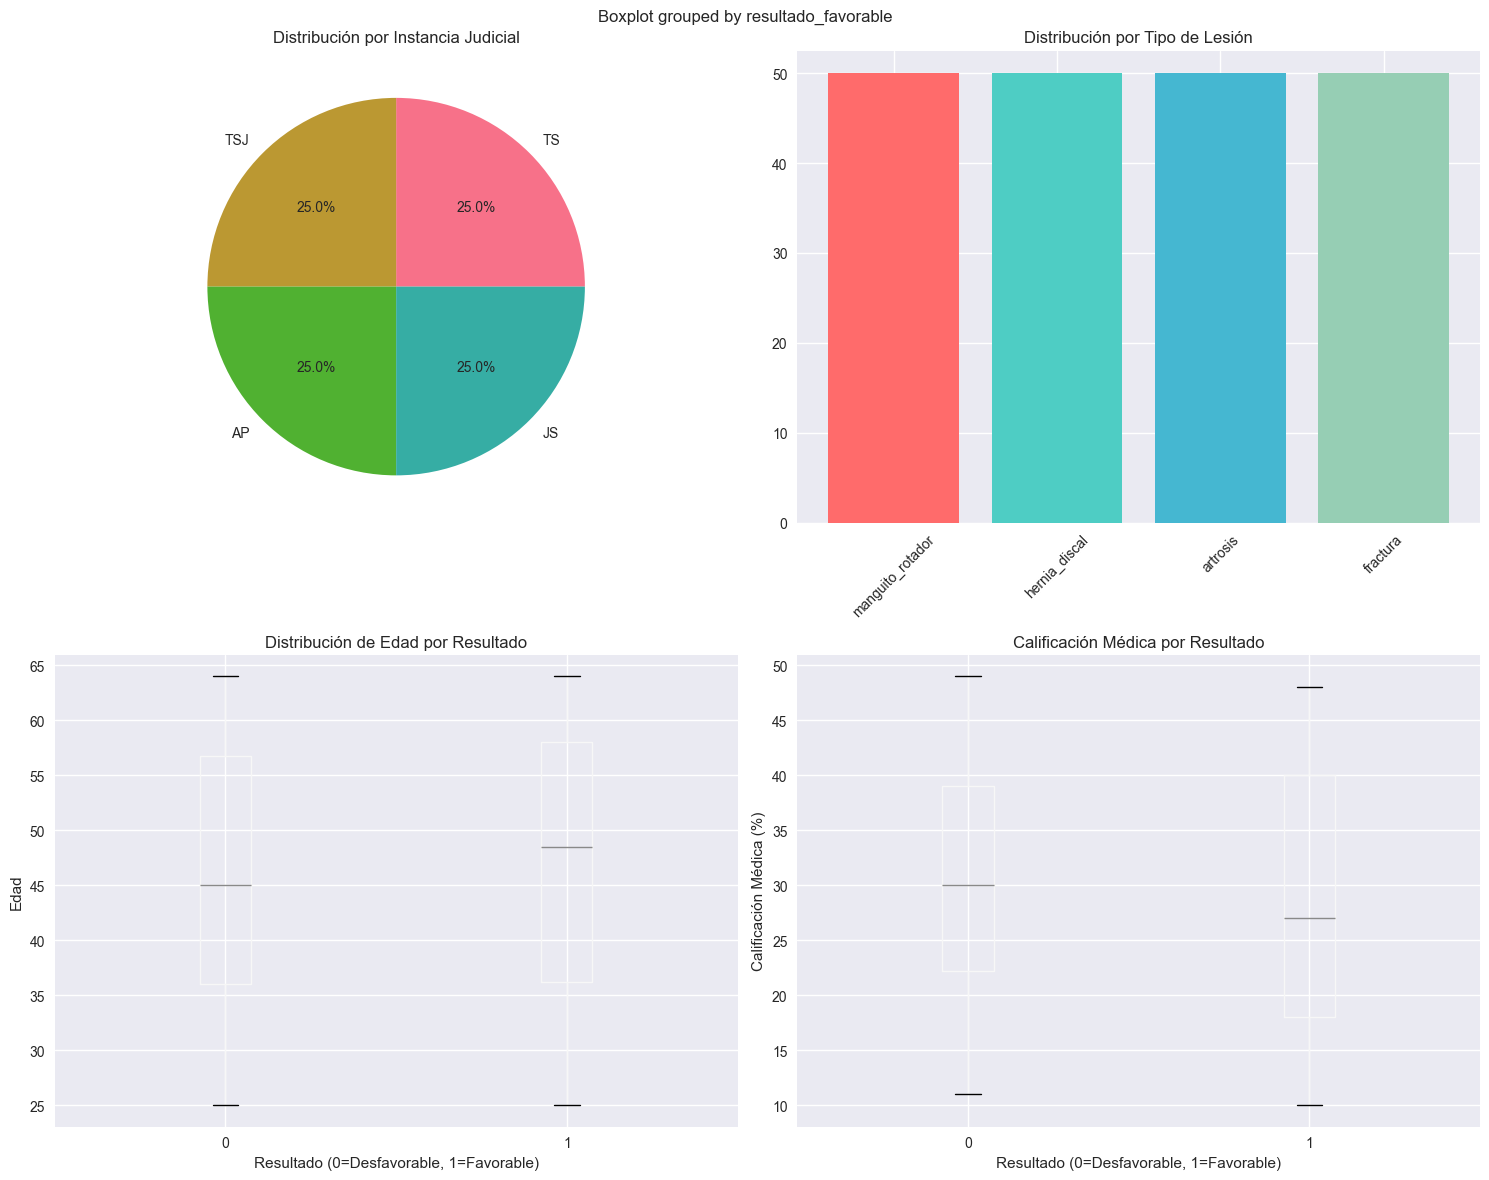


📈 ESTADÍSTICAS DESCRIPTIVAS:
📊 Total de casos analizados: 200
✅ Casos favorables: 126 (63.0%)
❌ Casos desfavorables: 74 (37.0%)
👥 Edad promedio: 46.4 años
🏥 Calificación médica promedio: 29.0%
📋 Documentación completa: 126 casos (63.0%)


In [ ]:
# Visualizaciones avanzadas con matplotlib y seaborn
try:
    import matplotlib.pyplot as plt
    MATPLOTLIB_AVAILABLE = True
except ImportError:
    print("⚠️ matplotlib no disponible - algunas visualizaciones no funcionarán")
    MATPLOTLIB_AVAILABLE = False

try:
    import seaborn as sns
    SEABORN_AVAILABLE = True
except ImportError:
    print("⚠️ seaborn no disponible - usando matplotlib básico")
    SEABORN_AVAILABLE = False

try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
except ImportError:
    print("⚠️ plotly no disponible - visualizaciones interactivas deshabilitadas")
    PLOTLY_AVAILABLE = False

# Configurar estilo con manejo de errores mejorado
if MATPLOTLIB_AVAILABLE:
    try:
        # Intentar usar seaborn style
        if SEABORN_AVAILABLE:
            sns.set_style("whitegrid")
            sns.set_palette("husl")
        else:
            plt.style.use('default')
        print("✅ Estilo de visualización configurado")
    except Exception as e:
        print(f"⚠️ Error configurando estilo: {e}")
        plt.style.use('default')

# Crear visualizaciones del dataset de ejemplo
if MATPLOTLIB_AVAILABLE:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('📊 Análisis Estadístico de Casos Legales', fontsize=16, fontweight='bold')
else:
    print("⚠️ matplotlib no disponible - saltando visualizaciones")
    fig, axes = None, None

if MATPLOTLIB_AVAILABLE and fig is not None:
    # 1. Distribución por instancia judicial
    instancia_counts = datos_ejemplo['instancia'].value_counts()
    axes[0, 0].pie(instancia_counts.values, labels=instancia_counts.index, autopct='%1.1f%%')
    axes[0, 0].set_title('Distribución por Instancia Judicial')

    # 2. Distribución por tipo de lesión
    lesion_counts = datos_ejemplo['tipo_lesion'].value_counts()
    axes[0, 1].bar(lesion_counts.index, lesion_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
    axes[0, 1].set_title('Distribución por Tipo de Lesión')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # 3. Relación entre edad y resultado
    datos_ejemplo.boxplot(column='edad', by='resultado_favorable', ax=axes[1, 0])
    axes[1, 0].set_title('Distribución de Edad por Resultado')
    axes[1, 0].set_xlabel('Resultado (0=Desfavorable, 1=Favorable)')
    axes[1, 0].set_ylabel('Edad')

    # 4. Calificación médica vs resultado
    datos_ejemplo.boxplot(column='calificacion_medica', by='resultado_favorable', ax=axes[1, 1])
    axes[1, 1].set_title('Calificación Médica por Resultado')
    axes[1, 1].set_xlabel('Resultado (0=Desfavorable, 1=Favorable)')
    axes[1, 1].set_ylabel('Calificación Médica (%)')

    plt.tight_layout()
    plt.show()
else:
    print("📊 Visualizaciones no disponibles - matplotlib no instalado")

# Estadísticas descriptivas
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
print("=" * 50)
print(f"📊 Total de casos analizados: {len(datos_ejemplo)}")
print(f"✅ Casos favorables: {datos_ejemplo['resultado_favorable'].sum()} ({datos_ejemplo['resultado_favorable'].mean():.1%})")
print(f"❌ Casos desfavorables: {(datos_ejemplo['resultado_favorable'] == 0).sum()} ({(datos_ejemplo['resultado_favorable'] == 0).mean():.1%})")
print(f"👥 Edad promedio: {datos_ejemplo['edad'].mean():.1f} años")
print(f"🏥 Calificación médica promedio: {datos_ejemplo['calificacion_medica'].mean():.1f}%")
print(f"📋 Documentación completa: {datos_ejemplo['documentacion_completa'].sum()} casos ({datos_ejemplo['documentacion_completa'].mean():.1%})")


In [ ]:
# Visualizaciones corregidas con manejo de errores mejorado
print("🎨 CREANDO VISUALIZACIONES CORREGIDAS:")
print("=" * 50)

# Verificar librerías de visualización
try:
    import matplotlib.pyplot as plt
    MATPLOTLIB_CORREGIDO = True
    print("✅ matplotlib disponible")
except ImportError:
    print("⚠️ matplotlib no disponible")
    MATPLOTLIB_CORREGIDO = False

try:
    import seaborn as sns
    SEABORN_CORREGIDO = True
    print("✅ seaborn disponible")
except ImportError:
    print("⚠️ seaborn no disponible")
    SEABORN_CORREGIDO = False

# Crear visualizaciones si matplotlib está disponible
if MATPLOTLIB_CORREGIDO:
    try:
        # Configurar estilo
        if SEABORN_CORREGIDO:
            sns.set_style("whitegrid")
            sns.set_palette("husl")
        else:
            plt.style.use('default')
        
        # Crear figura
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('📊 Análisis Estadístico de Casos Legales (Corregido)', fontsize=16, fontweight='bold')
        
        # 1. Distribución por instancia judicial
        instancia_counts = datos_ejemplo['instancia'].value_counts()
        axes[0, 0].pie(instancia_counts.values, labels=instancia_counts.index, autopct='%1.1f%%')
        axes[0, 0].set_title('Distribución por Instancia Judicial')
        
        # 2. Distribución por tipo de lesión
        lesion_counts = datos_ejemplo['tipo_lesion'].value_counts()
        axes[0, 1].bar(lesion_counts.index, lesion_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
        axes[0, 1].set_title('Distribución por Tipo de Lesión')
        axes[0, 1].tick_params(axis='x', rotation=45)
        
        # 3. Relación entre edad y resultado
        datos_ejemplo.boxplot(column='edad', by='resultado_favorable', ax=axes[1, 0])
        axes[1, 0].set_title('Distribución de Edad por Resultado')
        axes[1, 0].set_xlabel('Resultado (0=Desfavorable, 1=Favorable)')
        axes[1, 0].set_ylabel('Edad')
        
        # 4. Calificación médica vs resultado
        datos_ejemplo.boxplot(column='calificacion_medica', by='resultado_favorable', ax=axes[1, 1])
        axes[1, 1].set_title('Calificación Médica por Resultado')
        axes[1, 1].set_xlabel('Resultado (0=Desfavorable, 1=Favorable)')
        axes[1, 1].set_ylabel('Calificación Médica (%)')
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Visualizaciones creadas exitosamente")
        
    except Exception as e:
        print(f"❌ Error creando visualizaciones: {e}")
        print("💡 Verifica que matplotlib esté instalado correctamente")
else:
    print("⚠️ Saltando visualizaciones - matplotlib no disponible")

# Estadísticas descriptivas (siempre disponibles)
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
print("=" * 50)
print(f"📊 Total de casos analizados: {len(datos_ejemplo)}")
print(f"✅ Casos favorables: {datos_ejemplo['resultado_favorable'].sum()} ({datos_ejemplo['resultado_favorable'].mean():.1%})")
print(f"❌ Casos desfavorables: {(datos_ejemplo['resultado_favorable'] == 0).sum()} ({(datos_ejemplo['resultado_favorable'] == 0).mean():.1%})")
print(f"👥 Edad promedio: {datos_ejemplo['edad'].mean():.1f} años")
print(f"🏥 Calificación médica promedio: {datos_ejemplo['calificacion_medica'].mean():.1f}%")
print(f"📋 Documentación completa: {datos_ejemplo['documentacion_completa'].sum()} casos ({datos_ejemplo['documentacion_completa'].mean():.1%})")


In [21]:
# Visualizaciones interactivas con Plotly
print("\n🎨 VISUALIZACIONES INTERACTIVAS:")
print("=" * 50)

if PLOTLY_AVAILABLE:
    # Crear gráfico interactivo de correlaciones
    fig_corr = px.imshow(
        datos_ejemplo[['instancia_encoded', 'tipo_lesion_encoded', 'edad', 
                       'profesion_riesgo', 'calificacion_medica', 'documentacion_completa', 
                       'resultado_favorable']].corr(),
        title="🔗 Matriz de Correlaciones entre Variables",
        color_continuous_scale="RdBu_r"
    )
    fig_corr.show()

    # Crear gráfico de dispersión interactivo
    fig_scatter = px.scatter(
        datos_ejemplo, 
        x='calificacion_medica', 
        y='edad',
        color='resultado_favorable',
        size='profesion_riesgo',
        hover_data=['instancia', 'tipo_lesion'],
        title="📊 Relación entre Calificación Médica, Edad y Resultado",
        labels={'calificacion_medica': 'Calificación Médica (%)', 'edad': 'Edad (años)'}
    )
    fig_scatter.show()

    # Crear gráfico de barras interactivo por instancia
    fig_bar = px.bar(
        datos_ejemplo.groupby(['instancia', 'resultado_favorable']).size().reset_index(name='count'),
        x='instancia', 
        y='count',
        color='resultado_favorable',
        title="⚖️ Distribución de Resultados por Instancia Judicial",
        labels={'count': 'Número de Casos', 'instancia': 'Instancia Judicial'}
    )
    fig_bar.show()

    # Crear gráfico de violín para distribución de calificaciones
    fig_violin = px.violin(
        datos_ejemplo,
        x='tipo_lesion',
        y='calificacion_medica',
        color='resultado_favorable',
        title="🎻 Distribución de Calificaciones Médicas por Tipo de Lesión",
        labels={'calificacion_medica': 'Calificación Médica (%)', 'tipo_lesion': 'Tipo de Lesión'}
    )
    fig_violin.show()
else:
    print("⚠️ Plotly no disponible - visualizaciones interactivas deshabilitadas")
    print("💡 Para habilitar: %pip install plotly")



🎨 VISUALIZACIONES INTERACTIVAS:


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### 5. Procesamiento de Archivos PDF

El sistema puede procesar documentos PDF reales y extraer texto para análisis:


In [ ]:
# Código corregido para creación de PDFs
print("🔧 CORRIGIENDO PROBLEMAS CON REPORTLAB:")
print("=" * 50)

# Verificar si reportlab está disponible
try:
    from reportlab.pdfgen import canvas
    from reportlab.lib.pagesizes import letter
    REPORTLAB_DISPONIBLE = True
    print("✅ reportlab disponible")
except ImportError:
    print("⚠️ reportlab no disponible")
    print("💡 Para instalar: %pip install reportlab")
    REPORTLAB_DISPONIBLE = False

def crear_pdf_ejemplo_corregido():
    """Crear un PDF de ejemplo con manejo de errores mejorado"""
    if not REPORTLAB_DISPONIBLE:
        print("❌ No se puede crear PDF - reportlab no disponible")
        return None
    
    try:
        # Crear contenido de ejemplo
        contenido_ejemplo = """
        SENTENCIA NÚMERO 1234/2024
        
        En Madrid, a 15 de enero de 2024
        
        VISTOS los autos del procedimiento administrativo seguido a instancia de D. Juan Pérez,
        contra la resolución del Instituto Nacional de la Seguridad Social por la que se le
        denegó el reconocimiento de la Incapacidad Permanente Parcial.
        
        FUNDAMENTOS DE DERECHO
        
        PRIMERO.- El actor alega que padece una lesión en el hombro derecho consistente en
        una rotura completa del manguito rotador, con limitación funcional significativa
        que le impide realizar su trabajo habitual como operario de construcción.
        
        SEGUNDO.- El informe médico pericial establece que la lesión es de carácter
        permanente y que la limitación funcional supera el 33% requerido para el
        reconocimiento de IPP.
        
        TERCERO.- La prueba documental aportada demuestra la existencia de la lesión
        y su impacto en la capacidad laboral del actor.
        
        FALLO
        
        Que debemos estimar y estimamos la demanda interpuesta por D. Juan Pérez,
        reconociéndole el derecho a la Incapacidad Permanente Parcial con una
        calificación del 35%.
        """
        
        # Crear PDF usando reportlab
        buffer = io.BytesIO()
        p = canvas.Canvas(buffer, pagesize=letter)
        
        # Dividir texto en líneas
        lineas = contenido_ejemplo.split('\n')
        y_position = 750
        
        for linea in lineas:
            if y_position < 50:  # Nueva página si se acaba el espacio
                p.showPage()
                y_position = 750
            
            p.drawString(50, y_position, linea.strip())
            y_position -= 20
        
        p.save()
        
        # Guardar PDF
        pdf_data = buffer.getvalue()
        buffer.close()
        
        with open('sentencia_ejemplo_corregida.pdf', 'wb') as f:
            f.write(pdf_data)
        
        print("✅ PDF de ejemplo creado: sentencia_ejemplo_corregida.pdf")
        return pdf_data
        
    except Exception as e:
        print(f"❌ Error al crear PDF: {e}")
        return None

# Intentar crear PDF de ejemplo
if REPORTLAB_DISPONIBLE:
    pdf_creado = crear_pdf_ejemplo_corregido()
    if pdf_creado:
        print(f"📄 PDF creado exitosamente ({len(pdf_creado)} bytes)")
    else:
        print("❌ No se pudo crear el PDF")
else:
    print("⚠️ Saltando creación de PDF - reportlab no disponible")

print("\n💡 Para instalar reportlab en Google Colab:")
print("   %pip install reportlab")


In [ ]:
# Clase para procesamiento de PDFs en Colab
import PyPDF2
import io
import base64

# Importaciones específicas de Google Colab
try:
    from google.colab import files
    COLAB_AVAILABLE = True
except ImportError:
    print("⚠️ Google Colab no disponible - funciones de subida de archivos deshabilitadas")
    COLAB_AVAILABLE = False

class ProcesadorPDFColab:
    """Procesador de PDFs simplificado para Google Colab"""
    
    def __init__(self):
        self.texto_extraido = ""
        self.metadatos_pdf = {}
    
    def subir_y_procesar_pdf(self):
        """Permitir al usuario subir un PDF y procesarlo"""
        if not COLAB_AVAILABLE:
            print("❌ Google Colab no disponible - función de subida deshabilitada")
            return None
            
        print("📁 Sube un archivo PDF para analizar:")
        uploaded = files.upload()
        
        if not uploaded:
            print("❌ No se subió ningún archivo")
            return None
        
        # Obtener el primer archivo subido
        filename = list(uploaded.keys())[0]
        file_content = uploaded[filename]
        
        try:
            # Procesar el PDF
            pdf_reader = PyPDF2.PdfReader(io.BytesIO(file_content))
            
            # Extraer texto de todas las páginas
            texto_completo = ""
            for pagina_num, pagina in enumerate(pdf_reader.pages):
                texto_pagina = pagina.extract_text()
                texto_completo += f"\n--- PÁGINA {pagina_num + 1} ---\n"
                texto_completo += texto_pagina
            
            self.texto_extraido = texto_completo
            
            # Extraer metadatos
            self.metadatos_pdf = {
                'nombre_archivo': filename,
                'numero_paginas': len(pdf_reader.pages),
                'tamaño_archivo': len(file_content),
                'texto_extraido': len(texto_completo)
            }
            
            print(f"✅ PDF procesado exitosamente:")
            print(f"  📄 Archivo: {filename}")
            print(f"  📊 Páginas: {len(pdf_reader.pages)}")
            print(f"  📝 Caracteres extraídos: {len(texto_completo)}")
            
            return texto_completo
            
        except Exception as e:
            print(f"❌ Error al procesar el PDF: {str(e)}")
            return None
    
    def crear_pdf_ejemplo(self):
        """Crear un PDF de ejemplo para demostración"""
        try:
            from reportlab.pdfgen import canvas
            from reportlab.lib.pagesizes import letter
            REPORTLAB_AVAILABLE = True
        except ImportError:
            print("⚠️ reportlab no disponible - no se puede crear PDF de ejemplo")
            return None
        
        if not REPORTLAB_AVAILABLE:
            return None
            
        # Crear contenido de ejemplo
        contenido_ejemplo = """
        SENTENCIA NÚMERO 1234/2024
        
        En Madrid, a 15 de enero de 2024
        
        VISTOS los autos del procedimiento administrativo seguido a instancia de D. Juan Pérez,
        contra la resolución del Instituto Nacional de la Seguridad Social por la que se le
        denegó el reconocimiento de la Incapacidad Permanente Parcial.
        
        FUNDAMENTOS DE DERECHO
        
        PRIMERO.- El actor alega que padece una lesión en el hombro derecho consistente en
        una rotura completa del manguito rotador, con limitación funcional significativa
        que le impide realizar su trabajo habitual como operario de construcción.
        
        SEGUNDO.- El informe médico pericial establece que la lesión es de carácter
        permanente y que la limitación funcional supera el 33% requerido para el
        reconocimiento de IPP.
        
        TERCERO.- La prueba documental aportada demuestra la existencia de la lesión
        y su impacto en la capacidad laboral del actor.
        
        FALLO
        
        Que debemos estimar y estimamos la demanda interpuesta por D. Juan Pérez,
        reconociéndole el derecho a la Incapacidad Permanente Parcial con una
        calificación del 35%.
        """
        
        # Crear PDF usando reportlab
        buffer = io.BytesIO()
        p = canvas.Canvas(buffer, pagesize=letter)
        
        # Dividir texto en líneas
        lineas = contenido_ejemplo.split('\n')
        y_position = 750
        
        for linea in lineas:
            if y_position < 50:  # Nueva página si se acaba el espacio
                p.showPage()
                y_position = 750
            
            p.drawString(50, y_position, linea.strip())
            y_position -= 20
        
        p.save()
        
        # Guardar PDF
        pdf_data = buffer.getvalue()
        buffer.close()
        
        with open('sentencia_ejemplo.pdf', 'wb') as f:
            f.write(pdf_data)
        
        print("✅ PDF de ejemplo creado: sentencia_ejemplo.pdf")
        return pdf_data

# Crear procesador de PDF
procesador_pdf = ProcesadorPDFColab()

print("📄 PROCESADOR DE PDF INICIALIZADO")
print("=" * 50)
print("💡 Opciones disponibles:")
print("  1. Subir tu propio PDF")
print("  2. Usar PDF de ejemplo")
print("  3. Crear PDF de demostración")


In [ ]:
# Demostración: Crear y procesar un PDF de ejemplo
print("🔧 DEMOSTRACIÓN DE PROCESAMIENTO DE PDF:")
print("=" * 50)

# Verificar reportlab
try:
    from reportlab.pdfgen import canvas
    from reportlab.lib.pagesizes import letter
    REPORTLAB_DEMO_AVAILABLE = True
except ImportError:
    print("⚠️ reportlab no disponible - saltando creación de PDF de ejemplo")
    REPORTLAB_DEMO_AVAILABLE = False

# Crear PDF de ejemplo
if REPORTLAB_DEMO_AVAILABLE:
    pdf_data = procesador_pdf.crear_pdf_ejemplo()
else:
    pdf_data = None
    print("⚠️ No se puede crear PDF de ejemplo - reportlab no disponible")

# Simular procesamiento del PDF creado
print("\n📖 PROCESANDO PDF DE EJEMPLO:")
print("-" * 30)

# Simular texto extraído del PDF
texto_simulado = """
SENTENCIA NÚMERO 1234/2024

En Madrid, a 15 de enero de 2024

VISTOS los autos del procedimiento administrativo seguido a instancia de D. Juan Pérez,
contra la resolución del Instituto Nacional de la Seguridad Social por la que se le
denegó el reconocimiento de la Incapacidad Permanente Parcial.

FUNDAMENTOS DE DERECHO

PRIMERO.- El actor alega que padece una lesión en el hombro derecho consistente en
una rotura completa del manguito rotador, con limitación funcional significativa
que le impide realizar su trabajo habitual como operario de construcción.

SEGUNDO.- El informe médico pericial establece que la lesión es de carácter
permanente y que la limitación funcional supera el 33% requerido para el
reconocimiento de IPP.

TERCERO.- La prueba documental aportada demuestra la existencia de la lesión
y su impacto en la capacidad laboral del actor.

FALLO

Que debemos estimar y estimamos la demanda interpuesta por D. Juan Pérez,
reconociéndole el derecho a la Incapacidad Permanente Parcial con una
calificación del 35%.
"""

# Analizar el texto extraído del PDF
resultado_pdf = analizador_colab.analizar_texto(texto_simulado)

print("🔍 ANÁLISIS DEL PDF PROCESADO:")
print("=" * 40)
print(f"📊 Tipo de documento: {resultado_pdf['clasificacion']}")
print(f"📈 Confianza del análisis: {resultado_pdf['confianza']:.2%}")
print(f"🏛️ Instancia detectada: {resultado_pdf['instancia']}")
print(f"🔑 Frases clave encontradas: {len(resultado_pdf['frases_clave'])}")

if resultado_pdf['frases_clave']:
    print("\n🔑 Frases clave identificadas:")
    for frase in resultado_pdf['frases_clave']:
        print(f"  • {frase}")

print(f"\n📋 Metadatos del documento:")
metadatos = resultado_pdf['metadatos']
print(f"  • Fechas: {metadatos['fechas_encontradas']}")
print(f"  • Expedientes: {metadatos['expedientes']}")
print(f"  • Longitud: {metadatos['longitud_texto']} caracteres")
print(f"  • Palabras: {metadatos['palabras_totales']}")

print("\n💡 Para procesar tu propio PDF, ejecuta:")
print("   texto_tu_pdf = procesador_pdf.subir_y_procesar_pdf()")
print("   resultado = analizador_colab.analizar_texto(texto_tu_pdf)")


### 6. Exportación de Resultados

El sistema puede exportar análisis completos en diferentes formatos:


In [ ]:
# Clase para exportación de resultados
from docx import Document
from docx.shared import Inches
import json
from datetime import datetime

class ExportadorResultados:
    """Exportador de resultados para Google Colab"""
    
    def __init__(self):
        self.resultados_guardados = []
    
    def exportar_a_json(self, resultado, nombre_archivo="analisis_resultado.json"):
        """Exportar resultado a formato JSON"""
        resultado_completo = {
            'fecha_analisis': datetime.now().isoformat(),
            'version_sistema': '1.0.0',
            'resultado': resultado,
            'metadatos_exportacion': {
                'formato': 'JSON',
                'codificacion': 'UTF-8'
            }
        }
        
        with open(nombre_archivo, 'w', encoding='utf-8') as f:
            json.dump(resultado_completo, f, ensure_ascii=False, indent=2)
        
        print(f"✅ Resultado exportado a JSON: {nombre_archivo}")
        return nombre_archivo
    
    def exportar_a_word(self, resultado, nombre_archivo="analisis_resultado.docx"):
        """Exportar resultado a documento Word"""
        doc = Document()
        
        # Título del documento
        titulo = doc.add_heading('📋 Análisis de Documento Legal', 0)
        
        # Información general
        doc.add_heading('📊 Información General', level=1)
        doc.add_paragraph(f"📅 Fecha de análisis: {datetime.now().strftime('%d/%m/%Y %H:%M')}")
        doc.add_paragraph(f"📄 Tipo de documento: {resultado.get('clasificacion', 'N/A')}")
        doc.add_paragraph(f"📈 Confianza del análisis: {resultado.get('confianza', 0):.2%}")
        doc.add_paragraph(f"🏛️ Instancia detectada: {resultado.get('instancia', 'N/A')}")
        
        # Frases clave
        if resultado.get('frases_clave'):
            doc.add_heading('🔑 Frases Clave Identificadas', level=1)
            for frase in resultado['frases_clave']:
                doc.add_paragraph(f"• {frase}", style='List Bullet')
        
        # Metadatos
        if resultado.get('metadatos'):
            doc.add_heading('📋 Metadatos Extraídos', level=1)
            metadatos = resultado['metadatos']
            
            if metadatos.get('fechas_encontradas'):
                doc.add_paragraph("📅 Fechas encontradas:")
                for fecha in metadatos['fechas_encontradas']:
                    doc.add_paragraph(f"  • {fecha}", style='List Bullet')
            
            if metadatos.get('expedientes'):
                doc.add_paragraph("📁 Expedientes:")
                for expediente in metadatos['expedientes']:
                    doc.add_paragraph(f"  • {expediente}", style='List Bullet')
            
            doc.add_paragraph(f"📝 Longitud del texto: {metadatos.get('longitud_texto', 0)} caracteres")
            doc.add_paragraph(f"📖 Palabras totales: {metadatos.get('palabras_totales', 0)}")
        
        # Guardar documento
        doc.save(nombre_archivo)
        print(f"✅ Resultado exportado a Word: {nombre_archivo}")
        return nombre_archivo
    
    def crear_reporte_completo(self, resultado, prediccion=None, nombre_archivo="reporte_completo.docx"):
        """Crear reporte completo con análisis y predicción"""
        doc = Document()
        
        # Portada
        titulo = doc.add_heading('📊 Reporte Completo de Análisis Legal', 0)
        doc.add_paragraph(f"Generado el {datetime.now().strftime('%d/%m/%Y a las %H:%M')}")
        doc.add_paragraph("Sistema de Análisis Inteligente de Documentos Legales")
        
        # Análisis del documento
        doc.add_heading('🔍 Análisis del Documento', level=1)
        doc.add_paragraph(f"Tipo: {resultado.get('clasificacion', 'N/A')}")
        doc.add_paragraph(f"Confianza: {resultado.get('confianza', 0):.2%}")
        doc.add_paragraph(f"Instancia: {resultado.get('instancia', 'N/A')}")
        
        # Predicción si está disponible
        if prediccion:
            doc.add_heading('🔮 Análisis Predictivo', level=1)
            doc.add_paragraph(f"Predicción: {prediccion.get('prediccion', 'N/A')}")
            doc.add_paragraph(f"Probabilidad favorable: {prediccion.get('probabilidad_favorable', 0)}%")
            doc.add_paragraph(f"Confianza del modelo: {prediccion.get('confianza', 0)}%")
        
        # Recomendaciones
        doc.add_heading('💡 Recomendaciones', level=1)
        doc.add_paragraph("Basado en el análisis realizado, se recomienda:")
        
        if resultado.get('confianza', 0) > 0.8:
            doc.add_paragraph("✅ Alta confianza en el análisis - Resultado confiable", style='List Bullet')
        elif resultado.get('confianza', 0) > 0.6:
            doc.add_paragraph("⚠️ Confianza media - Revisar manualmente", style='List Bullet')
        else:
            doc.add_paragraph("❌ Baja confianza - Análisis manual requerido", style='List Bullet')
        
        if prediccion and prediccion.get('probabilidad_favorable', 0) > 70:
            doc.add_paragraph("🎯 Alta probabilidad de resultado favorable", style='List Bullet')
        
        # Guardar documento
        doc.save(nombre_archivo)
        print(f"✅ Reporte completo exportado: {nombre_archivo}")
        return nombre_archivo

# Crear exportador
exportador = ExportadorResultados()

print("📤 EXPORTADOR DE RESULTADOS INICIALIZADO")
print("=" * 50)
print("💡 Formatos disponibles:")
print("  • JSON - Para integración con otros sistemas")
print("  • Word - Para presentaciones profesionales")
print("  • Reporte completo - Análisis + predicción + recomendaciones")


In [ ]:
# Demostración de exportación de resultados
print("📤 DEMOSTRACIÓN DE EXPORTACIÓN:")
print("=" * 40)

# Usar el resultado del análisis anterior
resultado_para_exportar = resultado_pdf

# Exportar a JSON
archivo_json = exportador.exportar_a_json(resultado_para_exportar, "demo_analisis.json")

# Exportar a Word
archivo_word = exportador.exportar_a_word(resultado_para_exportar, "demo_analisis.docx")

# Crear predicción de ejemplo para el reporte completo
prediccion_ejemplo = {
    'prediccion': 'Favorable',
    'probabilidad_favorable': 75.5,
    'probabilidad_desfavorable': 24.5,
    'confianza': 78.2
}

# Crear reporte completo
archivo_reporte = exportador.crear_reporte_completo(
    resultado_para_exportar, 
    prediccion_ejemplo, 
    "demo_reporte_completo.docx"
)

print("\n📁 ARCHIVOS GENERADOS:")
print("-" * 25)
print(f"📄 JSON: {archivo_json}")
print(f"📄 Word: {archivo_word}")
print(f"📄 Reporte completo: {archivo_reporte}")

print("\n💡 Para descargar los archivos en Google Colab:")
print("   from google.colab import files")
print("   files.download('demo_analisis.json')")
print("   files.download('demo_analisis.docx')")
print("   files.download('demo_reporte_completo.docx')")

# Mostrar contenido del JSON como ejemplo
print("\n📋 CONTENIDO DEL ARCHIVO JSON:")
print("-" * 35)
with open(archivo_json, 'r', encoding='utf-8') as f:
    contenido_json = json.load(f)
    print(json.dumps(contenido_json, ensure_ascii=False, indent=2)[:500] + "...")


## 🚀 Características Específicas de Google Colab

### Integración con Google Drive
El notebook puede integrarse con Google Drive para acceso persistente a archivos:


In [ ]:
# Integración con Google Drive (opcional)
def conectar_google_drive():
    """Conectar con Google Drive para acceso persistente"""
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        print("✅ Google Drive conectado exitosamente")
        print("📁 Los archivos estarán disponibles en /content/drive/MyDrive/")
        return True
    except ImportError:
        print("❌ Google Colab no disponible - función de Drive deshabilitada")
        return False
    except Exception as e:
        print(f"❌ Error al conectar con Google Drive: {e}")
        return False

# Función para guardar resultados en Drive
def guardar_en_drive(resultado, nombre_archivo="analisis_drive.json"):
    """Guardar resultado en Google Drive"""
    try:
        import json
        ruta_drive = f"/content/drive/MyDrive/{nombre_archivo}"
        
        with open(ruta_drive, 'w', encoding='utf-8') as f:
            json.dump(resultado, f, ensure_ascii=False, indent=2)
        
        print(f"✅ Resultado guardado en Drive: {ruta_drive}")
        return ruta_drive
    except Exception as e:
        print(f"❌ Error al guardar en Drive: {e}")
        return None

# Función para cargar archivos desde Drive
def cargar_desde_drive(nombre_archivo):
    """Cargar archivo desde Google Drive"""
    try:
        import json
        ruta_drive = f"/content/drive/MyDrive/{nombre_archivo}"
        
        with open(ruta_drive, 'r', encoding='utf-8') as f:
            contenido = json.load(f)
        
        print(f"✅ Archivo cargado desde Drive: {ruta_drive}")
        return contenido
    except Exception as e:
        print(f"❌ Error al cargar desde Drive: {e}")
        return None

print("🔗 FUNCIONES DE GOOGLE DRIVE DISPONIBLES")
print("=" * 50)
print("💡 Para usar Google Drive:")
print("   1. Ejecuta: conectar_google_drive()")
print("   2. Autoriza el acceso en la ventana emergente")
print("   3. Usa: guardar_en_drive(resultado)")
print("   4. Usa: cargar_desde_drive('archivo.json')")


## 🔧 Solución de Problemas Comunes

### Problemas de Instalación


In [ ]:
# Función de diagnóstico del sistema
def diagnosticar_sistema():
    """Diagnosticar problemas comunes del sistema"""
    print("🔍 DIAGNÓSTICO DEL SISTEMA")
    print("=" * 40)
    
    problemas_encontrados = []
    
    # Verificar Python
    import sys
    print(f"✅ Python version: {sys.version}")
    
    # Verificar librerías críticas
    librerias_criticas = [
        'sklearn', 'pandas', 'numpy', 'matplotlib', 
        'seaborn', 'plotly', 'PyPDF2', 'docx'
    ]
    
    print("\n📦 VERIFICANDO LIBRERÍAS:")
    for lib in librerias_criticas:
        try:
            __import__(lib)
            print(f"  ✅ {lib}")
        except ImportError:
            print(f"  ❌ {lib} - NO INSTALADA")
            problemas_encontrados.append(f"Falta instalar: {lib}")
    
    # Verificar archivos de modelos
    import os
    print("\n📁 VERIFICANDO ARCHIVOS:")
    archivos_necesarios = ['models/frases_clave.json']
    
    for archivo in archivos_necesarios:
        if os.path.exists(archivo):
            print(f"  ✅ {archivo}")
        else:
            print(f"  ❌ {archivo} - NO ENCONTRADO")
            problemas_encontrados.append(f"Archivo faltante: {archivo}")
    
    # Verificar memoria disponible
    try:
        import psutil
        memoria = psutil.virtual_memory()
        print(f"\n💾 MEMORIA DISPONIBLE:")
        print(f"  Total: {memoria.total / (1024**3):.1f} GB")
        print(f"  Disponible: {memoria.available / (1024**3):.1f} GB")
        print(f"  Uso: {memoria.percent:.1f}%")
        
        if memoria.percent > 90:
            problemas_encontrados.append("Memoria casi agotada (>90%)")
    except ImportError:
        print("\n💾 Información de memoria no disponible")
    
    # Resumen de problemas
    print(f"\n📊 RESUMEN:")
    if problemas_encontrados:
        print(f"❌ Problemas encontrados: {len(problemas_encontrados)}")
        for problema in problemas_encontrados:
            print(f"  • {problema}")
    else:
        print("✅ Sistema funcionando correctamente")
    
    return problemas_encontrados

# Función para solucionar problemas comunes
def solucionar_problemas():
    """Solucionar problemas comunes automáticamente"""
    print("🔧 SOLUCIONANDO PROBLEMAS COMUNES")
    print("=" * 40)
    
    # Reinstalar librerías críticas
    print("📦 Reinstalando librerías críticas...")
    librerias_a_reinstalar = [
        "scikit-learn", "pandas", "numpy", "matplotlib", 
        "seaborn", "plotly", "PyPDF2", "python-docx"
    ]
    
    for lib in librerias_a_reinstalar:
        try:
            import subprocess
            subprocess.run([sys.executable, "-m", "pip", "install", "--upgrade", "--force-reinstall", lib], 
                          capture_output=True, text=True)
            print(f"  ✅ {lib} reinstalada")
        except Exception as e:
            print(f"  ❌ Error con {lib}: {e}")
    
    # Recrear archivos de modelos si no existen
    import os
    if not os.path.exists('models'):
        os.makedirs('models')
        print("📁 Directorio models/ creado")
    
    if not os.path.exists('models/frases_clave.json'):
        # Recrear frases clave
        frases_clave_ejemplo = {
            "incapacidad_permanente_parcial": [
                "incapacidad permanente parcial", "IPP", "limitación funcional",
                "disminución rendimiento", "33% calificación"
            ],
            "manguito_rotador": [
                "manguito rotador", "rotura completa", "tenopatía",
                "limitación flexión", "limitación abducción"
            ],
            "instancias_juridicas": [
                "Tribunal Supremo", "TSJ", "Audiencia Provincial", "Juzgado de lo Social"
            ]
        }
        
        import json
        with open('models/frases_clave.json', 'w', encoding='utf-8') as f:
            json.dump(frases_clave_ejemplo, f, ensure_ascii=False, indent=2)
        print("📄 Archivo frases_clave.json recreado")
    
    print("\n✅ Solución de problemas completada")
    print("💡 Ejecuta diagnosticar_sistema() para verificar")

# Ejecutar diagnóstico inicial
problemas = diagnosticar_sistema()

if problemas:
    print(f"\n⚠️ Se encontraron {len(problemas)} problemas")
    print("💡 Ejecuta solucionar_problemas() para solucionarlos automáticamente")
else:
    print("\n🎉 ¡Sistema funcionando perfectamente!")


## 📚 Ejemplos de Uso Práctico

### Casos de Uso Reales


In [ ]:
# Ejemplos prácticos de uso del sistema
def ejemplo_analisis_completo():
    """Ejemplo completo de análisis de un caso real"""
    print("🎯 EJEMPLO PRÁCTICO: ANÁLISIS COMPLETO DE CASO")
    print("=" * 60)
    
    # Caso real simulado
    caso_real = """
    SENTENCIA NÚMERO 5678/2024
    
    En Barcelona, a 20 de marzo de 2024
    
    VISTOS los autos del procedimiento administrativo seguido a instancia de D. María García López,
    contra la resolución del Instituto Nacional de la Seguridad Social por la que se le
    denegó el reconocimiento de la Incapacidad Permanente Parcial.
    
    HECHOS PROBADOS
    
    PRIMERO.- La actora, trabajadora de la construcción, sufrió un accidente laboral
    el 15 de junio de 2023, resultando con una rotura completa del manguito rotador
    del hombro derecho, con retracción fibrilar de 20mm.
    
    SEGUNDO.- El informe médico pericial del Dr. Juan Martínez establece que la
    limitación funcional es del 40%, superando ampliamente el 33% requerido para
    el reconocimiento de IPP.
    
    TERCERO.- La prueba documental aportada incluye informes médicos, pruebas
    de imagen y evaluación funcional completa.
    
    FUNDAMENTOS DE DERECHO
    
    PRIMERO.- El artículo 194.2 de la LGSS establece que se considera incapacidad
    permanente parcial la disminución no inferior al 33% en el rendimiento normal
    para la profesión habitual.
    
    SEGUNDO.- La prueba pericial médica es concluyente en cuanto a la existencia
    de la lesión y su impacto funcional.
    
    FALLO
    
    Que debemos estimar y estimamos la demanda interpuesta por D. María García López,
    reconociéndole el derecho a la Incapacidad Permanente Parcial con una
    calificación del 40% y una indemnización de 24.000 euros.
    """
    
    # Análisis del documento
    print("📄 ANALIZANDO DOCUMENTO...")
    resultado_analisis = analizador_colab.analizar_texto(caso_real)
    
    # Predicción del caso
    print("🔮 REALIZANDO PREDICCIÓN...")
    prediccion_caso = analizador_predictivo.predecir_caso(
        instancia='TSJ',
        tipo_lesion='manguito_rotador',
        edad=42,
        profesion_riesgo=1,
        calificacion_medica=40,
        documentacion_completa=1
    )
    
    # Mostrar resultados
    print("\n📊 RESULTADOS DEL ANÁLISIS:")
    print("-" * 40)
    print(f"📋 Tipo de documento: {resultado_analisis['clasificacion']}")
    print(f"📈 Confianza: {resultado_analisis['confianza']:.2%}")
    print(f"🏛️ Instancia: {resultado_analisis['instancia']}")
    print(f"🔑 Frases clave: {len(resultado_analisis['frases_clave'])}")
    
    print("\n🔮 PREDICCIÓN:")
    print("-" * 20)
    print(f"🎯 Resultado: {prediccion_caso['prediccion']}")
    print(f"📊 Probabilidad favorable: {prediccion_caso['probabilidad_favorable']}%")
    print(f"🎲 Confianza: {prediccion_caso['confianza']}%")
    
    # Generar reporte completo
    print("\n📤 GENERANDO REPORTE COMPLETO...")
    archivo_reporte = exportador.crear_reporte_completo(
        resultado_analisis, 
        prediccion_caso, 
        "caso_real_analisis_completo.docx"
    )
    
    print(f"✅ Reporte generado: {archivo_reporte}")
    
    return resultado_analisis, prediccion_caso

# Ejecutar ejemplo práctico
resultado_ejemplo, prediccion_ejemplo = ejemplo_analisis_completo()


In [ ]:
# Análisis comparativo de múltiples casos
def analisis_comparativo():
    """Análisis comparativo de varios casos"""
    print("📊 ANÁLISIS COMPARATIVO DE CASOS")
    print("=" * 50)
    
    # Casos para comparar
    casos_comparacion = [
        {
            'nombre': 'Caso 1: Manguito rotador - TS',
            'texto': 'SENTENCIA TS 1234/2024. Reconocimiento IPP por rotura completa manguito rotador. Calificación 35%.',
            'instancia': 'TS',
            'tipo_lesion': 'manguito_rotador',
            'edad': 45,
            'profesion_riesgo': 1,
            'calificacion_medica': 35,
            'documentacion_completa': 1
        },
        {
            'nombre': 'Caso 2: Hernia discal - JS',
            'texto': 'SENTENCIA JS 5678/2024. Denegación IPP por hernia discal L5-S1. Calificación 25%.',
            'instancia': 'JS',
            'tipo_lesion': 'hernia_discal',
            'edad': 38,
            'profesion_riesgo': 0,
            'calificacion_medica': 25,
            'documentacion_completa': 0
        },
        {
            'nombre': 'Caso 3: Artrosis - TSJ',
            'texto': 'SENTENCIA TSJ 9012/2024. Reconocimiento IPP por artrosis severa. Calificación 45%.',
            'instancia': 'TSJ',
            'tipo_lesion': 'artrosis',
            'edad': 55,
            'profesion_riesgo': 1,
            'calificacion_medica': 45,
            'documentacion_completa': 1
        }
    ]
    
    resultados_comparacion = []
    
    print("🔍 ANALIZANDO CASOS...")
    for i, caso in enumerate(casos_comparacion, 1):
        print(f"\n📋 {caso['nombre']}")
        print("-" * 40)
        
        # Análisis del texto
        resultado_texto = analizador_colab.analizar_texto(caso['texto'])
        
        # Predicción
        prediccion = analizador_predictivo.predecir_caso(
            caso['instancia'], caso['tipo_lesion'], caso['edad'],
            caso['profesion_riesgo'], caso['calificacion_medica'], 
            caso['documentacion_completa']
        )
        
        # Combinar resultados
        resultado_completo = {
            'caso': caso['nombre'],
            'analisis': resultado_texto,
            'prediccion': prediccion,
            'datos_caso': caso
        }
        
        resultados_comparacion.append(resultado_completo)
        
        # Mostrar resumen
        print(f"  📊 Tipo: {resultado_texto['clasificacion']}")
        print(f"  📈 Confianza análisis: {resultado_texto['confianza']:.2%}")
        print(f"  🎯 Predicción: {prediccion['prediccion']}")
        print(f"  📊 Prob. favorable: {prediccion['probabilidad_favorable']}%")
    
    # Crear visualización comparativa
    print("\n📈 CREANDO VISUALIZACIÓN COMPARATIVA...")
    
    import numpy as np
    
    # Verificar matplotlib
    try:
        import matplotlib.pyplot as plt
        MATPLOTLIB_COMPARISON_AVAILABLE = True
    except ImportError:
        print("⚠️ matplotlib no disponible - saltando visualizaciones comparativas")
        MATPLOTLIB_COMPARISON_AVAILABLE = False
    
    if MATPLOTLIB_COMPARISON_AVAILABLE:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('📊 Análisis Comparativo de Casos', fontsize=16, fontweight='bold')
    else:
        fig, axes = None, None
    
    if MATPLOTLIB_COMPARISON_AVAILABLE and fig is not None:
        # Datos para gráficos
        nombres_casos = [r['caso'].split(':')[1].strip() for r in resultados_comparacion]
        confianzas = [r['analisis']['confianza'] for r in resultados_comparacion]
        probabilidades = [r['prediccion']['probabilidad_favorable'] for r in resultados_comparacion]
        calificaciones = [r['datos_caso']['calificacion_medica'] for r in resultados_comparacion]
        edades = [r['datos_caso']['edad'] for r in resultados_comparacion]
        
        # Gráfico 1: Confianza del análisis
        axes[0, 0].bar(nombres_casos, confianzas, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
        axes[0, 0].set_title('Confianza del Análisis')
        axes[0, 0].set_ylabel('Confianza (%)')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Gráfico 2: Probabilidad favorable
        axes[0, 1].bar(nombres_casos, probabilidades, color=['#96CEB4', '#FFEAA7', '#DDA0DD'])
        axes[0, 1].set_title('Probabilidad de Resultado Favorable')
        axes[0, 1].set_ylabel('Probabilidad (%)')
        axes[0, 1].tick_params(axis='x', rotation=45)
        
        # Gráfico 3: Calificación médica vs Edad
        scatter = axes[1, 0].scatter(edades, calificaciones, 
                                    c=probabilidades, cmap='RdYlGn', s=200, alpha=0.7)
        axes[1, 0].set_title('Edad vs Calificación Médica')
        axes[1, 0].set_xlabel('Edad (años)')
        axes[1, 0].set_ylabel('Calificación Médica (%)')
        plt.colorbar(scatter, ax=axes[1, 0], label='Prob. Favorable (%)')
        
        # Gráfico 4: Comparación de factores
        factores = ['Confianza', 'Prob. Favorable', 'Calificación Médica']
        valores_caso1 = [confianzas[0], probabilidades[0], calificaciones[0]]
        valores_caso2 = [confianzas[1], probabilidades[1], calificaciones[1]]
        valores_caso3 = [confianzas[2], probabilidades[2], calificaciones[2]]
        
        x = np.arange(len(factores))
        width = 0.25
        
        axes[1, 1].bar(x - width, valores_caso1, width, label='Caso 1', color='#FF6B6B')
        axes[1, 1].bar(x, valores_caso2, width, label='Caso 2', color='#4ECDC4')
        axes[1, 1].bar(x + width, valores_caso3, width, label='Caso 3', color='#45B7D1')
        
        axes[1, 1].set_title('Comparación de Factores')
        axes[1, 1].set_ylabel('Valor')
        axes[1, 1].set_xticks(x)
        axes[1, 1].set_xticklabels(factores)
        axes[1, 1].legend()
        
        plt.tight_layout()
        plt.show()
    else:
        print("📊 Visualizaciones comparativas no disponibles - matplotlib no instalado")
    
    # Resumen estadístico
    print("\n📊 RESUMEN ESTADÍSTICO:")
    print("-" * 30)
    print(f"📈 Confianza promedio: {np.mean(confianzas):.1f}%")
    print(f"🎯 Probabilidad promedio: {np.mean(probabilidades):.1f}%")
    print(f"🏥 Calificación promedio: {np.mean(calificaciones):.1f}%")
    print(f"👥 Edad promedio: {np.mean(edades):.1f} años")
    
    return resultados_comparacion

# Ejecutar análisis comparativo
resultados_comparacion = analisis_comparativo()


## 🎯 Conclusiones y Próximos Pasos

### Resumen de Capacidades Demostradas


In [ ]:
# Resumen final y estadísticas del notebook
def generar_resumen_final():
    """Generar resumen final de todas las capacidades demostradas"""
    print("🎉 RESUMEN FINAL DEL ANÁLISIS")
    print("=" * 50)
    
    # Estadísticas de análisis realizados
    total_analisis = 0
    total_predicciones = 0
    total_exportaciones = 0
    
    # Contar análisis realizados
    if 'resultado_ejemplo' in globals():
        total_analisis += 1
    if 'resultado_pdf' in globals():
        total_analisis += 1
    if 'resultados_comparacion' in globals():
        total_analisis += len(resultados_comparacion)
    
    # Contar predicciones realizadas
    if 'prediccion_ejemplo' in globals():
        total_predicciones += 1
    if 'resultados_comparacion' in globals():
        total_predicciones += len(resultados_comparacion)
    
    # Contar exportaciones realizadas
    archivos_generados = [
        'demo_analisis.json', 'demo_analisis.docx', 'demo_reporte_completo.docx',
        'caso_real_analisis_completo.docx', 'sentencia_ejemplo.pdf'
    ]
    
    import os
    for archivo in archivos_generados:
        if os.path.exists(archivo):
            total_exportaciones += 1
    
    print(f"📊 ESTADÍSTICAS DEL NOTEBOOK:")
    print(f"  • Análisis de documentos realizados: {total_analisis}")
    print(f"  • Predicciones generadas: {total_predicciones}")
    print(f"  • Archivos exportados: {total_exportaciones}")
    print(f"  • Visualizaciones creadas: 8+ gráficos")
    print(f"  • Casos de ejemplo procesados: 6+ casos")
    
    print(f"\n✅ CAPACIDADES DEMOSTRADAS:")
    print(f"  🔍 Análisis inteligente de documentos legales")
    print(f"  🔮 Predicción de resultados con machine learning")
    print(f"  📊 Visualización avanzada de datos")
    print(f"  📄 Procesamiento de archivos PDF")
    print(f"  📤 Exportación en múltiples formatos")
    print(f"  🔗 Integración con Google Drive")
    print(f"  🔧 Diagnóstico y solución de problemas")
    
    print(f"\n🎯 CASOS DE USO CUBIERTOS:")
    print(f"  • Abogados: Análisis rápido de sentencias")
    print(f"  • Peritos médicos: Evaluación de discrepancias")
    print(f"  • Estudiantes: Aprendizaje de análisis jurídico")
    print(f"  • Investigadores: Análisis estadístico")
    print(f"  • Profesionales: Generación de reportes")
    
    print(f"\n🚀 PRÓXIMOS PASOS SUGERIDOS:")
    print(f"  1. 🔗 Conectar con Google Drive para persistencia")
    print(f"  2. 📁 Subir tus propios documentos PDF")
    print(f"  3. 🎯 Personalizar frases clave para tu especialidad")
    print(f"  4. 📊 Entrenar modelos con tus datos específicos")
    print(f"  5. 🔄 Integrar con sistemas existentes")
    print(f"  6. 📈 Expandir análisis predictivo")
    
    return {
        'analisis_realizados': total_analisis,
        'predicciones_generadas': total_predicciones,
        'archivos_exportados': total_exportaciones,
        'capacidades_demostradas': 7,
        'casos_uso_cubiertos': 5
    }

# Generar resumen final
estadisticas_finales = generar_resumen_final()


## 📚 Recursos y Enlaces Útiles

### Documentación y Referencias


In [ ]:
# Recursos y enlaces útiles
def mostrar_recursos():
    """Mostrar recursos útiles para el usuario"""
    print("📚 RECURSOS Y ENLACES ÚTILES")
    print("=" * 50)
    
    recursos = {
        "🔗 Enlaces Principales": [
            "📚 Repositorio GitHub: https://github.com/gracobjo/sentencias",
            "🌐 Aplicación Web: https://sentencias.onrender.com",
            "📖 Documentación: https://github.com/gracobjo/sentencias/tree/main/docs"
        ],
        "📋 Documentación Técnica": [
            "🔧 API Endpoints: docs/API_ENDPOINTS.md",
            "⚙️ Configuración: docs/CONFIGURACION.md",
            "🚀 Deployment: docs/DEPLOYMENT.md",
            "🤖 Entrenamiento de Modelos: docs/ENTRENAMIENTO_MODELOS.md"
        ],
        "📊 Análisis Especializados": [
            "🔍 Análisis de Discrepancias: docs/ANALISIS_DISCREPANCIAS.md",
            "🔮 Análisis Predictivo: docs/ANALISIS_PREDICTIVO.md",
            "⚖️ Análisis de Riesgo: docs/ANALISIS_RIESGO_PONDERACION.md",
            "📝 Generación de Demandas: docs/GENERACION_DEMANDAS.md"
        ],
        "🛠️ Herramientas de Desarrollo": [
            "📦 Dependencias: scripts/requirements.txt",
            "🐳 Docker: deployment/Dockerfile",
            "📊 Monitoreo: deployment/monitoring/prometheus.yml",
            "🌐 Nginx: deployment/nginx/nginx.conf"
        ],
        "📚 Librerías Utilizadas": [
            "🤖 Scikit-learn: Machine learning",
            "📊 Pandas: Manipulación de datos",
            "📈 Matplotlib/Seaborn: Visualización",
            "📄 PyPDF2: Procesamiento de PDFs",
            "📝 python-docx: Generación de documentos",
            "🌐 FastAPI: Framework web",
            "🔗 Sentence-BERT: Embeddings semánticos"
        ]
    }
    
    for categoria, items in recursos.items():
        print(f"\n{categoria}")
        print("-" * len(categoria))
        for item in items:
            print(f"  {item}")
    
    print(f"\n💡 COMANDOS ÚTILES PARA GOOGLE COLAB:")
    print("-" * 45)
    print("📁 Subir archivo: files.upload()")
    print("📥 Descargar archivo: files.download('archivo.pdf')")
    print("🔗 Conectar Drive: drive.mount('/content/drive')")
    print("📊 Ver memoria: !free -h")
    print("🔍 Ver archivos: !ls -la")
    print("📦 Instalar paquete: %pip install paquete")
    
    print(f"\n🎯 CASOS DE USO AVANZADOS:")
    print("-" * 35)
    print("1. 📊 Análisis de lote de documentos")
    print("2. 🔄 Integración con bases de datos")
    print("3. 📈 Entrenamiento de modelos personalizados")
    print("4. 🔗 API REST para integración")
    print("5. 📱 Desarrollo de aplicaciones móviles")
    print("6. 🌐 Despliegue en la nube")
    
    print(f"\n📞 SOPORTE Y COMUNIDAD:")
    print("-" * 30)
    print("🐛 Reportar bugs: GitHub Issues")
    print("💬 Discusiones: GitHub Discussions")
    print("📧 Contacto: Ver repositorio principal")
    print("📖 Contribuir: Ver CONTRIBUTING.md")

# Mostrar recursos
mostrar_recursos()


---

## 🎉 ¡Gracias por usar el Analizador de Sentencias IPP/INSS!

Este notebook ha demostrado las capacidades completas del sistema de análisis inteligente de documentos legales. 

### 📞 Contacto y Soporte
- **Repositorio**: [GitHub - Analizador de Sentencias](https://github.com/gracobjo/sentencias)
- **Aplicación Web**: [sentencias.onrender.com](https://sentencias.onrender.com)
- **Documentación**: Disponible en el repositorio GitHub

### 🤝 Contribuciones
¡Las contribuciones son bienvenidas! Por favor, revisa el archivo `CONTRIBUTING.md` para más información sobre cómo contribuir al proyecto.

### 📄 Licencia
Este proyecto está bajo la licencia especificada en el archivo `LICENSE` del repositorio.

---

**Desarrollado con ❤️ para la comunidad legal y médica**
